## San Francisco Crime Classification

In [1]:
#import lib
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.metrics import log_loss

In [3]:
#Load Data with pandas, and parse the first column into datetime

train = pd.read_csv('train.csv', parse_dates = ['Dates'])
#test = pd.read_csv('test.csv', parse_dates = ['Dates'])

##### Explore

In [4]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


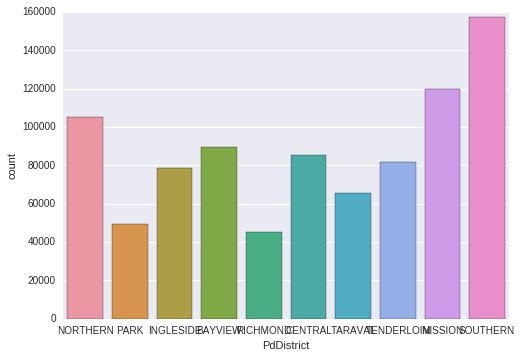

In [5]:
sns.countplot(train.PdDistrict)

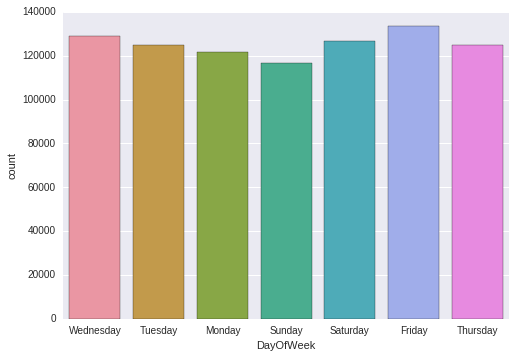

In [6]:
sns.countplot(train.DayOfWeek)

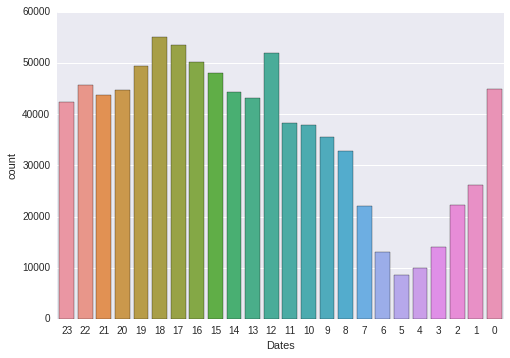

In [7]:
sns.countplot(train.Dates.dt.hour)

##### Preprocessing

In [8]:
#convert Category(label) to number
label_cat = preprocessing.LabelEncoder()
crime = label_cat.fit_transform(train.Category)

In [9]:
days = pd.get_dummies(train.DayOfWeek)
district = pd.get_dummies(train.PdDistrict)
hour = train.Dates.dt.hour
hour = pd.get_dummies(hour)

In [10]:
train_data = pd.concat([hour, days, district], axis=1)
train_data['crime'] = crime

In [11]:
#for test data
'''
days = pd.get_dummies(test.DayOfWeek)
district = pd.get_dummies(test.PdDistrict)
hour = test.Dates.dt.hour
hour = pd.get_dummies(hour)
'''

'\ndays = pd.get_dummies(test.DayOfWeek)\ndistrict = pd.get_dummies(test.PdDistrict)\nhour = test.Dates.dt.hour\nhour = pd.get_dummies(hour)\n'

In [12]:
#test_data = pd.concat([hour, days, district], axis=1)

In [13]:
training, validation = train_test_split(train_data, train_size=.60)

In [14]:
training.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
                  16,            17,            18,            19,
                  20,            21,            22,            23,
           u'Friday',     u'Monday',   u'Saturday',     u'Sunday',
         u'Thursday',    u'Tuesday',  u'Wednesday',    u'BAYVIEW',
          u'CENTRAL',  u'INGLESIDE',    u'MISSION',   u'NORTHERN',
             u'PARK',   u'RICHMOND',   u'SOUTHERN',    u'TARAVAL',
       u'TENDERLOIN',      u'crime'],
      dtype='object')

In [15]:
features = [            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
                  16,            17,            18,            19,
                  20,            21,            22,            23,
           u'Friday',     u'Monday',   u'Saturday',     u'Sunday',
         u'Thursday',    u'Tuesday',  u'Wednesday',    u'BAYVIEW',
          u'CENTRAL',  u'INGLESIDE',    u'MISSION',   u'NORTHERN',
             u'PARK',   u'RICHMOND',   u'SOUTHERN',    u'TARAVAL',
       u'TENDERLOIN']

In [17]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(training[features], training['crime'])

predicted = np.array(model.predict_proba(validation[features]))

print "log_loss :",log_loss(validation['crime'], predicted) 

log_loss : 2.58296677332
